3 2 107


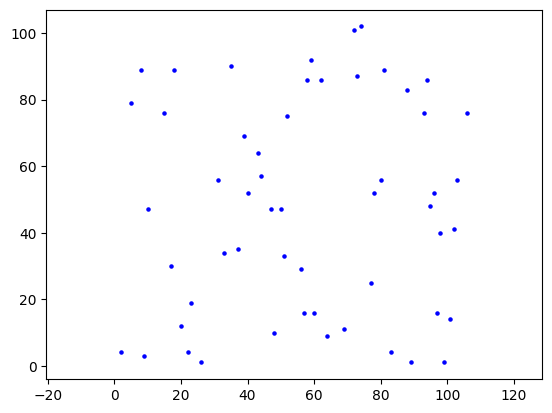

In [1]:
from collections import Counter
class Point:
	def __init__(self,x,y):
		self.x = x
		self.y = y
	def __lt__(self,other):
		if self.x < other.x:
			return True
		return False
	def __repr__(self):
		return "(%d,%d)"%(self.x,self.y)
	def __str__(self):
		return "(%d,%d)"%(self.x,self.y)
	def __hash__(self):
		return int.__hash__(self.x+self.y)
	def __eq__(self,other):
		if not other:
			return False
		if type(other) == int:
			return False
		if other.x == self.x and other.y == self.y:
			return True
		return False


class ECC:
	def __init__(self,a,b,p):
		self.a = a
		self.p = p
		self.b = b

	def check(self,x,y):
		lhs = (y**2)
		rhs = ((x**3)+(self.a*x)+self.b)
		return True if (lhs-rhs)%self.p == 0 else False


	def findAllPoints(self):
		l = list()
		for i in range(0,self.p):
			for j in range(0,self.p):
				if self.check(i,j):
					l.append(Point(i,j))
		return l


	def inverse(self,a):
		# fermant's theorem
		return pow(a,self.p-2,self.p)

	def valid(self,point):
		if point == None:
			return True
		lhs = (point.y**2)
		rhs = (point.x**3 + (self.a*point.x) + self.b)
		return True if (lhs-rhs)%self.p == 0 else False

	def inversePoint(self,point):
		if point.x == 0 and point.y  == 0:
			return point
		return Point(point.x,(-point.y)%self.p)


	def Double(self,point):
		m = (3*point.x**2 + self.a)*self.inverse(point.y*2)
		x = (m*m - (point.x*2))%self.p
		y = (m*(point.x-x) - point.y)%self.p
		result = Point(x,y)
		assert self.valid(result)
		return result

	def findBinarySequence(self, first_point, num_bits):
		l = [None]*num_bits
		l[0] = first_point
		for i in range(1,num_bits):
			try:
				l[i] = self.Double(l[i-1])
			except AssertionError:
				return l
		return l

	def Add(self,point1,point2):
		if point1 == point2:
			return self.Double(point1)
		elif point1 == self.inversePoint(point2):
			return None
		elif point1 == None:
			return point2
		elif point2 == None:
			return point1
		m = (point2.y - point1.y)*self.inverse((point2.x-point1.x))
		nx = ((m*m) - point1.x - point2.x)%self.p
		ny = ((m*(point1.x - nx)) - point1.y)%self.p
		try:
			assert self.valid(Point(nx,ny))
		except AssertionError:
			print("Error in points ",point1,point2,nx,ny)
		return Point(nx,ny)

	def multiply(self,binary_sequence,multiplier):
		t = 1
		p = None
		for i in range(len(bin(multiplier)) - 2):
			if (t<<i) & multiplier:
				if binary_sequence[i] == 0:
					return None
				if p:
					p = self.Add(p,binary_sequence[i])
				else:
					p = binary_sequence[i]
		return p
import matplotlib.pyplot as plt

class Grapher:
    def plotCurve(self, a, b, p):
        curve = ECC(a, b, p)
        x_coords = []
        y_coords = []
        for x in range(p):
            y_squared = (x**3 + a*x + b) % p
            if self.is_quadratic_residue(y_squared, p):
                y = self.sqrt_mod(y_squared, p)
                x_coords.append(x)
                y_coords.append(y)
        plt.scatter(x_coords, y_coords, s=5, c='b')
        plt.axis('equal')
        plt.show()


    def is_quadratic_residue(self, n, p):
        return pow(n, (p-1)//2, p) == 1

    def sqrt_mod(self, a, p):
        if p % 4 == 3:
            return pow(a, (p+1)//4, p)
        elif p % 8 == 5:
            x = pow(a, (p+3)//8, p)
            return x * self.mod_sqrt(2, p)
        else:
            return None

    def mod_sqrt(self, a, p):
        for i in range(1, p):
            if (i*i) % p == a:
                return i
        return None

g = Grapher()
a, b, p = map(int, input().strip().split(" "))
g.plotCurve(a, b, p)

1 2 107


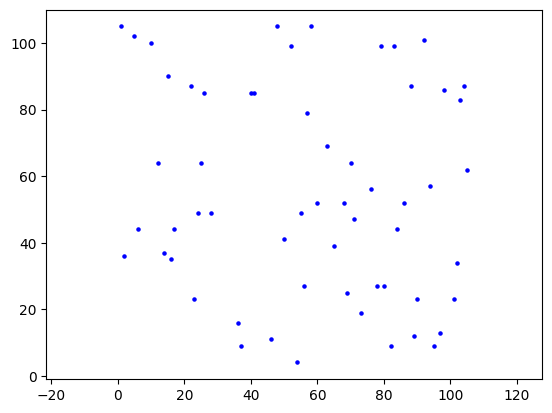

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
from flask import Flask, render_template, request
from collections import Counter
class ECC:
	def __init__(self,a,b,p):
		self.a = a
		self.p = p
		self.b = b

	def check(self,x,y):
		lhs = (y**2)
		rhs = ((x**3)+(self.a*x)+self.b)
		return True if (lhs-rhs)%self.p == 0 else False


	def findAllPoints(self):
		l = list()
		for i in range(0,self.p):
			for j in range(0,self.p):
				if self.check(i,j):
					l.append(Point(i,j))
		return l


	def inverse(self,a):
		# fermant's theorem
		return pow(a,self.p-2,self.p)

	def valid(self,point):
		if point == None:
			return True
		lhs = (point.y**2)
		rhs = (point.x**3 + (self.a*point.x) + self.b)
		return True if (lhs-rhs)%self.p == 0 else False

	def inversePoint(self,point):
		if point.x == 0 and point.y  == 0:
			return point
		return Point(point.x,(-point.y)%self.p)


	def Double(self,point):
		m = (3*point.x**2 + self.a)*self.inverse(point.y*2)
		x = (m*m - (point.x*2))%self.p
		y = (m*(point.x-x) - point.y)%self.p
		result = Point(x,y)
		assert self.valid(result)
		return result

	def findBinarySequence(self, first_point, num_bits):
		l = [None]*num_bits
		l[0] = first_point
		for i in range(1,num_bits):
			try:
				l[i] = self.Double(l[i-1])
			except AssertionError:
				return l
		return l

	def Add(self,point1,point2):
		if point1 == point2:
			return self.Double(point1)
		elif point1 == self.inversePoint(point2):
			return None
		elif point1 == None:
			return point2
		elif point2 == None:
			return point1
		m = (point2.y - point1.y)*self.inverse((point2.x-point1.x))
		nx = ((m*m) - point1.x - point2.x)%self.p
		ny = ((m*(point1.x - nx)) - point1.y)%self.p
		try:
			assert self.valid(Point(nx,ny))
		except AssertionError:
			print("Error in points ",point1,point2,nx,ny)
		return Point(nx,ny)

	def multiply(self,binary_sequence,multiplier):
		t = 1
		p = None
		for i in range(len(bin(multiplier)) - 2):
			if (t<<i) & multiplier:
				if binary_sequence[i] == 0:
					return None
				if p:
					p = self.Add(p,binary_sequence[i])
				else:
					p = binary_sequence[i]
		return p
import matplotlib.pyplot as plt

class Grapher:
    def plotCurve(self, a, b, p):
        curve = ECC(a, b, p)
        x_coords = []
        y_coords = []
        for x in range(p):
            y_squared = (x**3 + a*x + b) % p
            if self.is_quadratic_residue(y_squared, p):
                y = self.sqrt_mod(y_squared, p)
                x_coords.append(x)
                y_coords.append(y)
        plt.scatter(x_coords, y_coords, s=5, c='b')
        plt.axis('equal')
        plt.show()


    def is_quadratic_residue(self, n, p):
        return pow(n, (p-1)//2, p) == 1

    def sqrt_mod(self, a, p):
        if p % 4 == 3:
            return pow(a, (p+1)//4, p)
        elif p % 8 == 5:
            x = pow(a, (p+3)//8, p)
            return x * self.mod_sqrt(2, p)
        else:
            return None

    def mod_sqrt(self, a, p):
        for i in range(1, p):
            if (i*i) % p == a:
                return i
        return None

g = Grapher()
a, b, p = map(int, input().strip().split(" "))
g.plotCurve(a, b, p)

app = Flask(__name__)

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/plot", methods=["POST"])
def plot():
    a = int(request.form.get("a"))
    b = int(request.form.get("b"))
    p = int(request.form.get("p"))
    g = Grapher()
    g.plotCurve(a, b, p)
    return ""

if __name__ == "__main__":
    app.run()

# New Section